In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
# Since your CSV files are in the SAME folder as this notebook:
DATA_DIR = "."

print("Notebook is looking inside:", os.path.abspath(DATA_DIR))
print("\nFiles found here (showing csv only):")
csvs = [f for f in os.listdir(DATA_DIR) if f.lower().endswith(".csv")]
for f in csvs:
    print("-", f)

if len(csvs) == 0:
    raise FileNotFoundError("No CSV files found in the notebook folder. Move the CSVs here or change DATA_DIR.")


Notebook is looking inside: c:\Users\USER\Desktop\Linkedin Projects\NIST CSF Cyber Analytics

Files found here (showing csv only):
- Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
- Monday-WorkingHours.pcap_ISCX.csv
- Tuesday-WorkingHours.pcap_ISCX.csv


In [16]:
FILES = {
    "monday": "Monday-WorkingHours.pcap_ISCX.csv",
    "tuesday": "Tuesday-WorkingHours.pcap_ISCX.csv",
    "friday": "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv",
}

paths = {k: os.path.join(DATA_DIR, v) for k, v in FILES.items()}
paths


{'monday': '.\\Monday-WorkingHours.pcap_ISCX.csv',
 'tuesday': '.\\Tuesday-WorkingHours.pcap_ISCX.csv',
 'friday': '.\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'}

In [17]:
def load_csv_safely(path: str, low_memory: bool = True) -> pd.DataFrame:
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {os.path.abspath(path)}")
    return pd.read_csv(path, low_memory=low_memory)

df_mon = load_csv_safely(paths["monday"])
df_tue = load_csv_safely(paths["tuesday"])
df_fri = load_csv_safely(paths["friday"])

print("Loaded successfully:")
print("Monday :", df_mon.shape)
print("Tuesday:", df_tue.shape)
print("Friday :", df_fri.shape)


Loaded successfully:
Monday : (529918, 79)
Tuesday: (445909, 79)
Friday : (225745, 79)


In [18]:
display(df_mon.head(3))
display(df_tue.head(3))
display(df_fri.head(3))


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [19]:
cols_mon = set(df_mon.columns)
cols_tue = set(df_tue.columns)
cols_fri = set(df_fri.columns)

common_cols = cols_mon & cols_tue & cols_fri
print("Common columns across all three:", len(common_cols))

only_mon = cols_mon - (cols_tue | cols_fri)
only_tue = cols_tue - (cols_mon | cols_fri)
only_fri = cols_fri - (cols_mon | cols_tue)

print("\nOnly in Monday :", len(only_mon))
print("Only in Tuesday:", len(only_tue))
print("Only in Friday :", len(only_fri))

print("\nExamples:")
print("Only Monday :", list(sorted(only_mon))[:10])
print("Only Tuesday:", list(sorted(only_tue))[:10])
print("Only Friday :", list(sorted(only_fri))[:10])


Common columns across all three: 79

Only in Monday : 0
Only in Tuesday: 0
Only in Friday : 0

Examples:
Only Monday : []
Only Tuesday: []
Only Friday : []


In [20]:
def find_label_column(df: pd.DataFrame):
    candidates = [c for c in df.columns if c.strip().lower() in ("label", "labels", "class")]
    if candidates:
        return candidates[0]
    candidates = [c for c in df.columns if "label" in c.strip().lower()]
    return candidates[0] if candidates else None

label_col = find_label_column(df_mon)
print("Detected label column:", label_col)

if label_col is not None:
    for name, df in [("monday", df_mon), ("tuesday", df_tue), ("friday", df_fri)]:
        print(f"\n{name.upper()} label distribution (top 15):")
        print(df[label_col].astype(str).value_counts().head(15))
else:
    print("No label column found. Double-check your CSV columns.")


Detected label column:  Label

MONDAY label distribution (top 15):
 Label
BENIGN    529918
Name: count, dtype: int64

TUESDAY label distribution (top 15):
 Label
BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name: count, dtype: int64

FRIDAY label distribution (top 15):
 Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64


In [21]:
def normal_attack_split(df: pd.DataFrame, label_col: str) -> pd.Series:
    labels = df[label_col].astype(str).str.strip()
    is_normal = labels.str.upper().eq("BENIGN")
    return pd.Series({
        "normal_count": int(is_normal.sum()),
        "attack_count": int((~is_normal).sum()),
        "attack_pct": float((~is_normal).mean() * 100)
    })

if label_col is not None:
    overview = pd.DataFrame({
        "monday": normal_attack_split(df_mon, label_col),
        "tuesday": normal_attack_split(df_tue, label_col),
        "friday": normal_attack_split(df_fri, label_col),
    }).T
    display(overview)


,normal_count,attack_count,attack_pct
monday,529918.0,0.0,0.000000
tuesday,432074.0,13835.0,3.102651
friday,97718.0,128027.0,56.713105


In [22]:
def find_time_column(df: pd.DataFrame):
    candidates = [c for c in df.columns if c.strip().lower() in ("timestamp", "time", "date")]
    if candidates:
        return candidates[0]
    candidates = [c for c in df.columns if "time" in c.strip().lower() or "date" in c.strip().lower()]
    return candidates[0] if candidates else None

time_col = find_time_column(df_mon)
print("Detected time column:", time_col)


Detected time column: None


In [23]:
num_cols = df_mon.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns in Monday:", len(num_cols))

display(df_mon[num_cols[:25]].describe().T)


Numeric columns in Monday: 78


,count,mean,std,min,25%,50%,75%,max
Destination Port,529918.0,1.064437e+04,2.139021e+04,0.0,53.000000,80.000000,443.000000,6.553500e+04
Flow Duration,529918.0,1.038927e+07,2.875195e+07,-1.0,176.000000,31303.000000,355744.750000,1.200000e+08
Total Fwd Packets,529918.0,1.039032e+01,8.924128e+02,1.0,2.000000,2.000000,4.000000,2.197590e+05
Total Backward Packets,529918.0,1.151710e+01,1.173319e+03,0.0,1.000000,2.000000,3.000000,2.919220e+05
Total Length of Fwd Packets,529918.0,5.324195e+02,6.228642e+03,0.0,18.000000,68.000000,187.000000,1.323378e+06
Total Length of Bwd Packets,529918.0,1.789841e+04,2.675470e+06,0.0,0.000000,144.000000,392.000000,6.554530e+08
Fwd Packet Length Max,529918.0,1.908972e+02,4.488338e+02,0.0,6.000000,40.000000,83.000000,2.336000e+04
Fwd Packet Length Min,529918.0,2.027728e+01,3.627579e+01,0.0,0.000000,6.000000,40.000000,2.293000e+03
Fwd Packet Length Mean,529918.0,5.074408e+01,9.196471e+01,0.0,6.000000,38.000000,53.000000,4.638923e+03
Fwd Packet Length Std,529918.0,5.745227e+01,1.465181e+02,0.0,0.000000,0.000000,26.162951,7.125597e+03


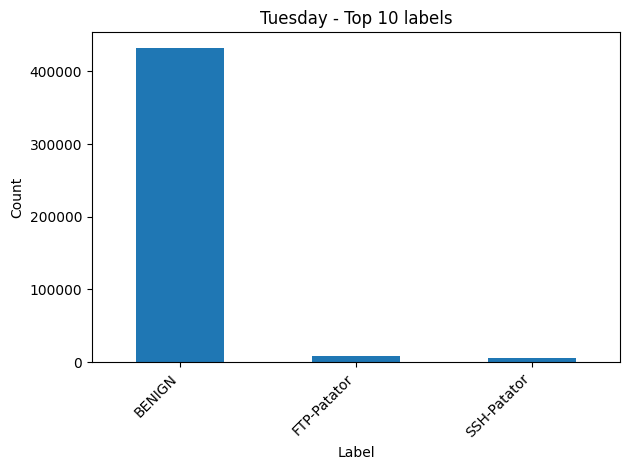

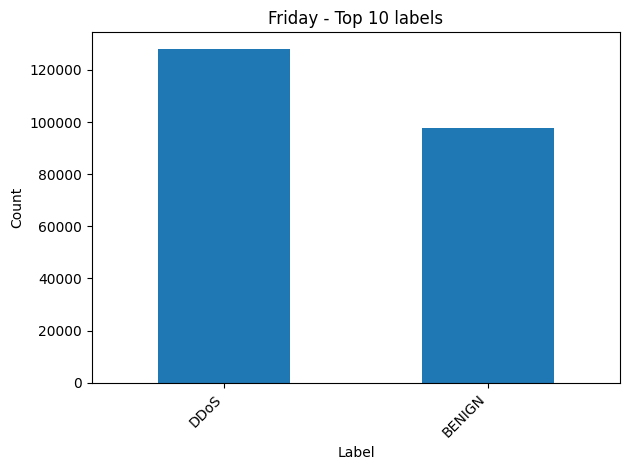

In [24]:
if label_col is not None:
    for name, df in [("tuesday", df_tue), ("friday", df_fri)]:
        vc = df[label_col].astype(str).value_counts().head(10)
        plt.figure()
        vc.plot(kind="bar")
        plt.title(f"{name.title()} - Top 10 labels")
        plt.xlabel("Label")
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()


In [25]:
df_mon.columns


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [26]:
[c for c in df_mon.columns if "time" in c.lower() or "date" in c.lower()]


[]